# Distant Reading, переходим к Python

## Как использовать этот код 

### (можно пропустить эту часть, если вы знаете, что такое Jupyter и ipynb-тетрадки -- в таком случае переходите сразу к "Начало работы")
То, на что вы сейчас смотрите — тетрадка Jupyter Notebook. Это одна из популярных сред для написания и __демонстрации__ кода на Python (и не только). Jupyter запускает питоновский код прямо в браузере (но локально, т.е. код исполняет ваш компьютер, в отличие от, например Google Colab). В Jupyter код можно запускать не целиком, а по ячейкам (в отличие от IDLE). 

Пример:

In [122]:
# ячейка с кодом
text = 'Мы с Даней сегодня тестим инструменты дистант ридинга'
print (text)

Мы с Даней сегодня тестим инструменты дистант ридинга


In [123]:
# еще одна ячейка с кодом. 
# Пространство имен общее — переменная text была заполнена в предыдущей ячейке
print (text.upper())

МЫ С ДАНЕЙ СЕГОДНЯ ТЕСТИМ ИНСТРУМЕНТЫ ДИСТАНТ РИДИНГА


Кроме того, ячейки бывают текстовыми — их можно форматировать с помощью формата разметки markdown (.md). Текст, который вы сейчас читаете, а также всякие описания и картинки в предыдущей части этого занятия, написаны как раз в таком формате. Файлы Jupyter Notebook имеют расширение .ipynb и автоматически рендерятся гитхабом. Например, вот эта __[тетрадка](first_dr_notebook_danya.ipynb)__  у меня на гитхабе.  

## Окей, а как я могу запустить код в таком .ipynb?

Есть разные варианты: 

### Через __[Google Colab](https://colab.research.google.com)__. 

Google Colab — это гугловский инструмент для написания кода в браузере и запуска прямо на серверах Google (с возможностью бесплатно использовать их вычислительные мощности, в т.ч. графические процессор  — GPU).  Google Colab — родственник Jupyter, они очень похожи. Разница в том, что Jupyter работает локально и использует ваш собственный питон, а Google Colab — это облачный сервис, похожий на Google Docs: вы можете делиться тетрадками и т.д. В Colab можно открыть эту тетрадку, указав ссылку на нее: 

![Colab](pics/git2colab_new.png) 

Просто загрузить .ipynb-файл в Colab тоже можно. 

### Скачать себе .ipynb и открыть в Jupyter

Скачать .ipynb с гитхаба: 

![Raw](pics/raw_download.png) 

Поставить Jupyter Notebook по инструкции __[отсюда](https://jupyter.readthedocs.io/en/latest/install.html)__. Открыть терминал (в Windows — командную строку).пойти в папку, внутри которой лежит скачанный .ipynb, написать там jupyter notebook. После этого у вас должно открыться в браузере что-то такое:

![Colab](pics/jupyter.png)

Тыкайте на тетрадку -- и все, можно работать в ней, писать код и т.п. Из Jupyter можно выгрузить и отдельно код в виде файла .py (но тогда разделение на ячейки пропадет).

### Клонировать репозиторий

Чуть более продвинутся версия предыдущего варианта. Делаете

git clone https://github.com/dhhse/dhcourse

И у вас есть этот код, а к тому же и все тексты рядом с ним (в папке texts лежит наш корпус в лемматизированном виде). **Правда, скачиывание через небыстрый интернет может занять сколько-то времени**.

### Скачать .ipynb и открыть в PyCharm
Если вы любите популярную у питонистов IDE PyCharm  -- она умеет открывать ipynb. Но для этого все равно нужен установеленный Jupyter. Поэтому надо проделать все то же, что в предыд.пункте, а потом открыть файл в PyCharm.

### Скачать файл .py из Google Colab или Jupyter и открыть любой IDE (IDLE, PyCharm, что угодно...)
Из Colab после создания копии вы можете выгрузить не весь .ipynb, а только код в .py. Этот код уже можно запускать где угодно, хоть из командной строки (терминала) вашего компьютера. Но тогда разделение на ячейки опять-таки пропадет.

# Начало работы

## Самый простой пример: работаем в Python с одиночным текстом

In [ ]:
# у себя в репозитории я положил рядом с кодом пример текста — Преступление и наказение Ф.М. Достоевского
# вот так я проверю, что рядом в папке лежит файл с корпусом.
!ls

In [ ]:
## У тех, кто смотрит в колабе, его, естественно, не будет. В случае, когда нам нужен всего один файл, это можно решить вот стандартный код для загрузки в колаб
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

 __[Ссылка на текстовый файл](https://github.com/dhhse/dhcourse/blob/master/dr_practice/Dostoevsky_PrestuplenieINakazanie.txt)__. 

In [3]:
# откроем файл в питоне
path_to_file = 'Dostoevsky_PrestuplenieINakazanie.txt'
prest_i_nak = open (path_to_file, 'r')
prest_i_nak_kak_stroka = prest_i_nak.read()

In [ ]:
## попробуйте вывести тут длину строки с помощью функции len; надо написать len (prest_i_nak_kak_stroka) -- так вы передадите в функцию len ваш текст, считанный в сторку 

In [ ]:
## попробуйте получить срез из первых 100 символов вашей строки с помощью срезов списка [:]
## т.е. напишите ниже вот это: prest_i_nak_kak_stroka [:100]
## и нажмите выполнить

# Сегментация текста

## 0. Простейший способ сегментации строки на токены (как бы на слова, но тупее грубее) — питоновский встроенный метод .split:

In [ ]:
prest_i_nak_kak_spisok_slov = prest_i_nak_kak_stroka.split() ## здесь в качестве аргумента можно воткнуть разделитель; по умолчанию это любое количество пробелов
print ('Примерное количество слов в "Преступлении и наказании":', len (prest_i_nak_kak_spisok_slov))

In [ ]:
prest_i_nak_kak_spisok_slov[:200]

#type (prest_i_nak_kak_stroka)

### попробуем получить список уникальных слов:

In [ ]:
prest_i_nak_kak_mnojestvo_slov = set(prest_i_nak_kak_spisok_slov) ## превратим список в множество
len (prest_i_nak_kak_mnojestvo_slov) ## получим число уникальных слов

In [ ]:
prest_i_nak_kak_spisok_unikalnyh_slov = list (prest_i_nak_kak_mnojestvo_slov)
(prest_i_nak_kak_spisok_unikalnyh_slov).sort()
prest_i_nak_kak_spisok_unikalnyh_slov [:1000]

## 1. Более умный способ: сегментируем текст регекспом

In [5]:
## питоновский модуль для регекспов
## ВООБЩЕ-ТО так делать НЕХОРОШО, потому что в тетрадках положено все импорты пихать в самую верхнюю ячейку
## но я считаю, что здесь в педагогических целях можно
import re

In [ ]:
prest_i_nak_spisok_re =  re.split ('( +|[.,!?–]|\n)',prest_i_nak_kak_stroka)

In [ ]:
prest_i_nak_spisok_re [:100]

## 2. Еще более умный способ: сегментируем текст готовым токенизатором — возьмем его из прекрасной библиотеки для обработки языка NLTK 

In [ ]:
# если у вас еще нет nltk, установите его:
!pip install nltk

In [6]:
from nltk.tokenize import word_tokenize
clean_prest_i_nak_kak_stroka = re.sub ('[.,?!-:]', '', prest_i_nak_kak_stroka)
prest_i_nak_nltk_tokenized = word_tokenize (clean_prest_i_nak_kak_stroka)

In [ ]:
prest_i_nak_nltk_tokenized [:100]

### А теперь давайте посчитаем частотность слов в нашем списке слов; т.е. собственно как часто повторяется каждое

In [ ]:
## для этого мы тоже не станем писать свое решение с нуля, а воспользуемся готовым от NLTK
## возьеме токенизированный список — и засунем его в функцию FreqDist от NLTK
from nltk import FreqDist
word_freqs_prest_i_nak = FreqDist(prest_i_nak_nltk_tokenized)
word_freqs_prest_i_nak.most_common (100)

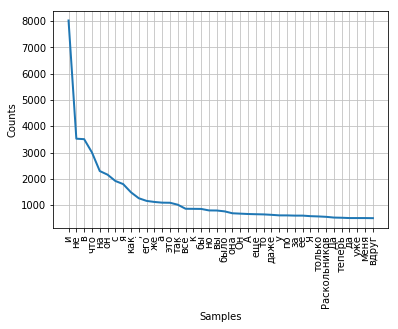

In [9]:
word_freqs_prest_i_nak.plot(40, cumulative=False)

# Стемминг, лемматизация, морфологический анализ

### В том же NLTK есть готовая реализация стеммера для русского языка. Давайте потестируем ее!

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [ ]:
## стеммер не быстрый, поэтому давайте возьмем первые 1000 слов, а не все
first_1000 = prest_i_nak_nltk_tokenized[:1000]
## этот стеммер не умеет сам токенизировать -- он работает только с отдельными словами. 
## Поэтому придется скармливать ему наш список по одному: 
prest_i_nak_first_1000_stemmed = []
for word in first_1000:
    prest_i_nak_first_1000_stemmed.append (stemmer.stem(word))

In [ ]:
en_stemmer = SnowballStemmer("english")
string = 'I love teaching students at HSE'
tostem = string.split()
for word in tostem:
    print (en_stemmer.stem(word))

In [ ]:
prest_i_nak_first_1000_stemmed

# Лемматизация текста

### MyStem

__[Mystem](https://tech.yandex.ru/mystem/)__ - это свободно распространяемый морфологический анализатор для русского языка с закрытым исходным кодом. То есть мы можем его бесплатно скачать с сайта и пользоваться им, но не можем посмотреть, что у него внутри и как оно работает.

Mystem был придуман одним из создателей Яндекса Ильёй Сегаловичем. Некоторый потомок Mystem'а до сих пор работает внутри большого поисковика Яндекса, анализируя слова при поиске.

MyStem значит my stemmer. Как мы с вами уже знаем (см. выше), стемминг -- это разбиение формы на основу и флексию. Программы-стеммеры умеют превращать фразу 'Маша поехала за грибами' в 'Маш поехал за гриб'.  Но на самом деле MyStem не стеммер, а полноценный морфологический АНАЛИЗАТОР. Он может гораздо больше: устанавливать словарную форму слова, определять часть речи и грамматические характеристики (падеж, число, время, род...). В последних версиях Mystem умеет и выбирать из нескольких возможных грамматических разборов один, наиболее верный.

У Mystem нет графического оконного интерфейса, запустить его можно только из командной строки. Зато есть обертка для Python — pymystem3.

__[Документация к MyStem](https://tech.yandex.ru/mystem/doc/index-docpage/)__

In [ ]:
# эта клетка нужна вам, если у вас не установлен модуль pymystem3.
## в колабе работает не всякий майстем
!pip install pymystem3

In [13]:
## импортируем непосредственно класс "анализатор MyStem" из pymystem3
from pymystem3 import Mystem

In [ ]:
help (Mystem()) ## всегда полезно почитать хелпы!

In [14]:
moi_analizator = Mystem() ## создаем анализатор
test = 'Даня тестирует машинную морфологию' ## создаем тестовую строку
lemmatized = moi_analizator.lemmatize(test) ## лемматизируем строку с помощью mystem 
print (lemmatized) ## напечатаем лемматизированную строку

['даня', ' ', 'тестировать', ' ', 'машинный', ' ', 'морфология', '\n']


In [15]:
prest_i_nak_by_mystem = moi_analizator.lemmatize(clean_prest_i_nak_kak_stroka) ## лемматизируем преступление и наказание с помощью mystem 
#print  (prest_i_nak_kak_by_mystem)

In [ ]:
word_freqs_prest_i_nak = FreqDist(word for word in prest_i_nak_by_mystem if re.search ('[, !;:\n]', word) == None)
word_freqs_prest_i_nak.most_common (100)

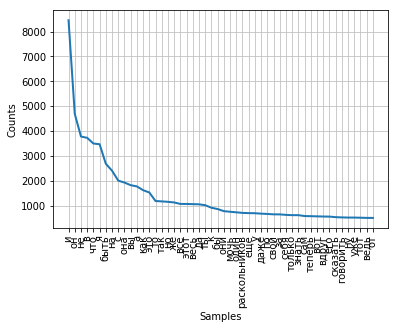

In [21]:
word_freqs_prest_i_nak.plot (50, cumulative=False);

## Распределение слов по тексту


In [121]:
## NLTK умеет много разного;
import nltk
nltk.download('stopwords')
from nltk import Text as nltk_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniilskorinkin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


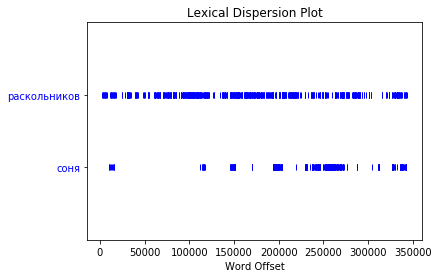

In [120]:
prest_i_nak_nltk_format = nltk_text(prest_i_nak_by_mystem)
prest_i_nak_nltk_format.dispersion_plot(["раскольников", "соня"])

## Теперь попробуем так: возьмем весь наш корпус, сольем в один файл — и запустим на нем то же самое

В GitHub нельзя запихать файл тяжелее 100 мб. Так что [вот он просто на гугл драйве](https://drive.google.com/open?id=1dEps432C_6jqsIgxPmhPu4keD_9VnM69). 

In [ ]:
## напишем это вместе на паре

## Тематическое моделирование (задание для скучающих, 7.10.2019)

Я умею делать тематическое моделирование только по олдскулу с помощью MALLET.
Поэтому задание для продвинутых: выяснить, как запускать в питоне топик моделинг -- и автоматически визуализировать полученные топики в таком духе: 

![топики](pics/topics.png)